In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
happiness = pd.read_csv('/content/happiness_report.csv')
happiness.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


Looking only at Mexico information and setting the Country as Index

In [ ]:
mexico = happiness.loc[happiness['Country or region']=='Mexico']
mexico = mexico.set_index('Country or region')
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


Creating a Histogram for 'Score' and identifying most frequent class or range. Mexico is being located with a label.

Text(6.595, 0, 'MEX')

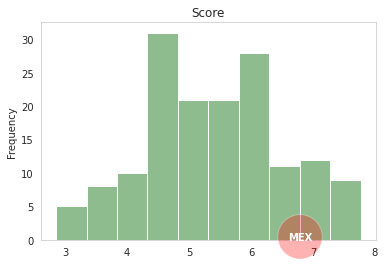

In [ ]:
happiness['Score'].plot.hist(title='Score', color='darkseagreen', grid=False)

mex_score = mexico['Score'].to_list()[0]

props_bbox={'facecolor':'red',
            'boxstyle':'circle',
            'alpha':0.3,
            'pad': 1}

plt.text(mex_score, 0, 'MEX', bbox=props_bbox, color='white', fontweight='bold')

Building a boxplot for life expectancy. Mexico is being located with an annotation.

Text(1.3, 0.861, 'MEX')

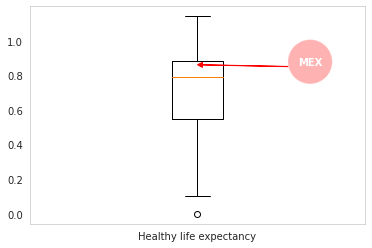

In [ ]:
plt.boxplot(happiness['Healthy life expectancy'].dropna(), labels=['Healthy life expectancy'])
plt.grid(False)

mex_healthy = mexico['Healthy life expectancy'].to_list()[0]

props_arrow={'width': 0.2,
             'headwidth': 5, 
             'headlength': 5,
             'color': 'red'}

props_bbox={'facecolor':'red',
            'boxstyle':'circle',
            'alpha':0.3,
            'pad': 1}

plt.annotate('MEX', xy=(1, mex_healthy), xytext=(1.3, mex_healthy), arrowprops=props_arrow, bbox=props_bbox, color='white', fontweight='bold')

Creating a Pie chart to analize happiness in Mexico. 

Text(0.5, 1.0, 'Contribution in Mexico happiness core')

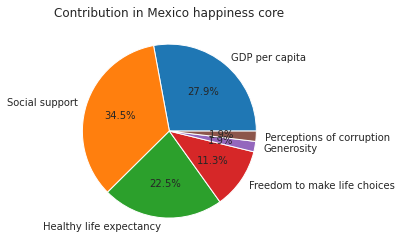

In [ ]:
mexico_pie = mexico.T.drop('Overall rank', axis='rows').drop('Score', axis='rows')
mexico_pie.index.name = 'Categories'
mexico_pie.columns = ['Result']

plt.pie('Result',labels=mexico_pie.index,data=mexico_pie,autopct='%1.1f%%')
plt.title('Contribution in Mexico happiness core')

Filtering DataFrame to look only at 5 countries (Most happy, least happy, Mexico, Canada and Spain). 

In [ ]:
happiness_5 = happiness.loc[((happiness['Overall rank'] == min(happiness['Overall rank'].to_list())) |
                             (happiness['Overall rank'] == max(happiness['Overall rank'].to_list())) |
                             (happiness['Country or region'] == 'Mexico') |
                             (happiness['Country or region'] == 'Canada') |
                             (happiness['Country or region'] == 'Spain'))]

happiness_5 = happiness_5.set_index('Country or region').drop('Overall rank', axis='columns').drop('Score', axis='columns')
happiness_5

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,
Finland,1.340,1.587,0.986,0.596,0.153,0.393
Canada,1.365,1.505,1.039,0.584,0.285,0.308
Mexico,1.070,1.323,0.861,0.433,0.074,0.073
Spain,1.286,1.484,1.062,0.362,0.153,0.079
South Sudan,0.306,0.575,0.295,0.010,0.202,0.091


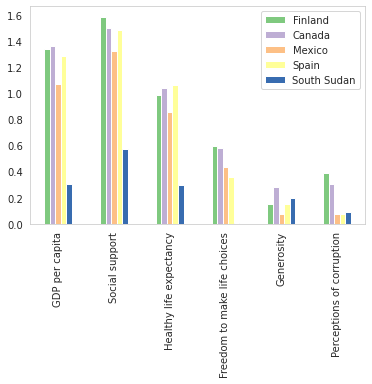

In [ ]:
sns.set_palette('Accent')
happiness_5.T.plot(kind='bar')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(False)

Building a 2x3 subplot with scatterplots from Score versus the other 6 happiness factors.

In [ ]:
happiness_5score = happiness.loc[((happiness['Overall rank'] == min(happiness['Overall rank'].to_list())) |
                             (happiness['Overall rank'] == max(happiness['Overall rank'].to_list())) |
                             (happiness['Country or region'] == 'Mexico') |
                             (happiness['Country or region'] == 'Canada') |
                             (happiness['Country or region'] == 'Spain'))]

happiness_5score = happiness_5score.set_index('Country or region').drop('Overall rank', axis='columns')

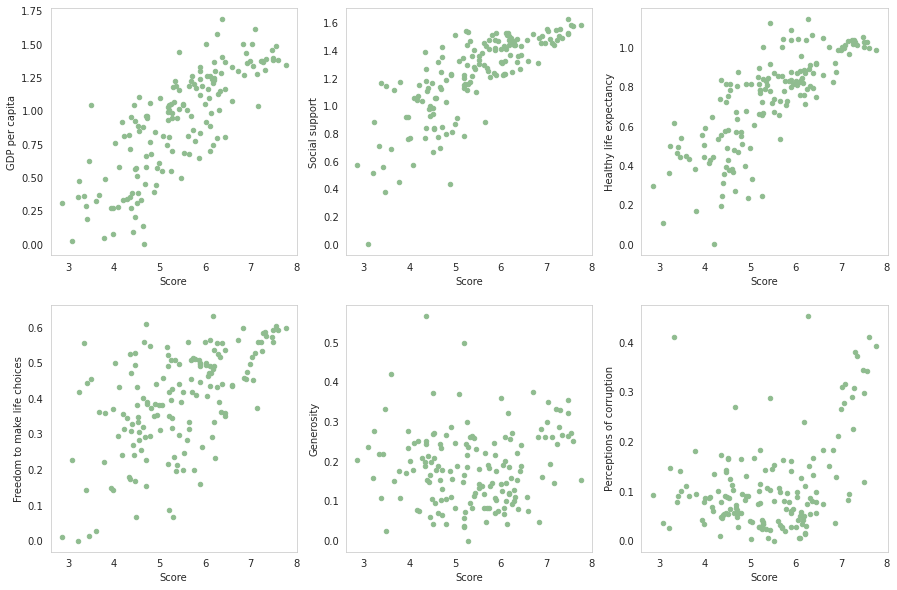

In [ ]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(231)
happiness.plot(kind='scatter', x='Score', y='GDP per capita', color='darkseagreen', ax=ax1, grid=False)

ax2 = fig.add_subplot(232)
happiness.plot(kind='scatter', x='Score', y='Social support', color='darkseagreen', ax=ax2, grid=False)

ax3 = fig.add_subplot(233)
happiness.plot(kind='scatter', x='Score', y='Healthy life expectancy', color='darkseagreen', ax=ax3, grid=False)

ax4 = fig.add_subplot(234)
happiness.plot(kind='scatter', x='Score', y='Freedom to make life choices', color='darkseagreen', ax=ax4, grid=False)

ax5 = fig.add_subplot(235)
happiness.plot(kind='scatter', x='Score', y='Generosity', color='darkseagreen', ax=ax5, grid=False)

ax6 = fig.add_subplot(236)
happiness.plot(kind='scatter', x='Score', y='Perceptions of corruption', color='darkseagreen', ax=ax6, grid=False)

Checking the previous scatterplots with a correlation heatmap

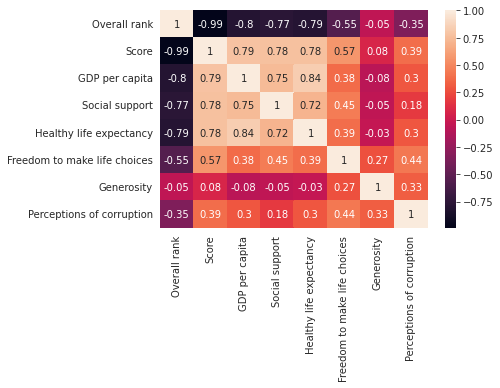

In [ ]:
sns.heatmap(round(happiness.corr(),2), annot=True)

Combining 'metadata' to plot average happiness per region

Text(0.5, 1.0, 'World Happiness Report')

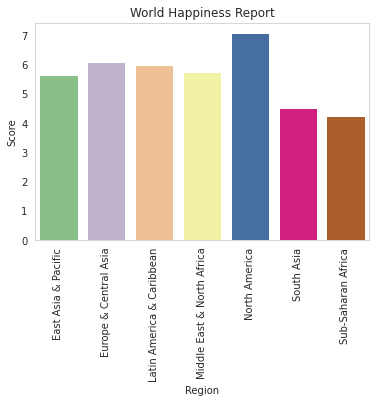

In [ ]:
metadata = pd.read_csv('/content/Metadata(2).csv')

merged_df = pd.merge(happiness, metadata, left_on='Country or region', right_on='TableName')
merged_byregion = merged_df[['Region', 'Score']].groupby('Region').mean()

sns.barplot(x=merged_byregion.index,y='Score',data=merged_byregion)
plt.xticks(rotation=90)
plt.grid(False)
plt.title('World Happiness Report')